# Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html#histograms-getting-started

In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
def show(image, file_name_attr=''):
    file_name = '12_{}.png'.format(file_name_attr)
    cv2.imshow(file_name, image)
    
    while(True):
        key = cv2.waitKey(0)
        if key == 27:
            cv2.destroyAllWindows()
            break
        elif key == ord('s'):
            if cv2.imwrite(os.path.join('saved', file_name), image):
                print('Saved Successfully!')
            else:
                print('Unable to Save!')
            cv2.destroyAllWindows()
            break

In [3]:
image = cv2.imread(os.path.join('images', '10.png'), cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# In OpenCV

In [4]:
hist = cv2.calcHist(image, [0], mask=None, histSize=[256], ranges=[0, 256])

# In Numpy

In [5]:
hist, bins = np.histogram(image.ravel(), bins=256, range=[0, 256], density=True)

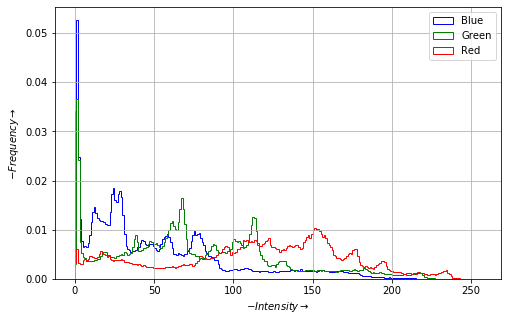

In [6]:
plt.figure(num='Histogram', figsize=(8, 5))
plt.hist(image[:, :, 0].ravel(), bins=256, range=[0, 256], density=True, color='b', align='mid', histtype='step', label='Blue')
plt.hist(image[:, :, 1].ravel(), bins=256, range=[0, 256], density=True, color='g', align='mid', histtype='step', label='Green')
plt.hist(image[:, :, 2].ravel(), bins=256, range=[0, 256], density=True, color='r', align='mid', histtype='step', label='Red')
plt.xlabel(r'$ - Intensity \rightarrow $')
plt.ylabel(r'$ - Frequency \rightarrow $')
plt.legend()
plt.grid()
plt.savefig(os.path.join('saved', '14_hist.png'))
plt.show()

# Equalization

Saved Successfully!


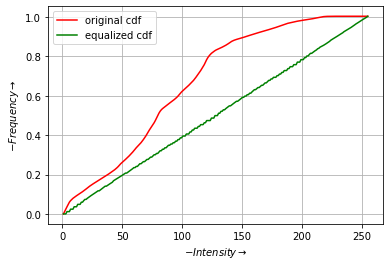

In [10]:
pdf, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 255], density=True)
cdf = pdf.cumsum()

transformation_function = (cdf * 255).astype(np.uint8)

equalized_gray_image = transformation_function[gray_image]
equalized_pdf, bins = np.histogram(equalized_gray_image.flatten(), bins=256, range=[0, 255], density=True)
equalized_cdf = equalized_pdf.cumsum()

show(equalized_image, 'equalized_gray_image')

plt.figure()
plt.plot(bins[1:], cdf, 'r-', label='original cdf')
plt.plot(bins[1:], equalized_cdf, 'g-', label='equalized cdf')
plt.xlabel(r'$ - Intensity \rightarrow $')
plt.ylabel(r'$ - Frequency \rightarrow $')
plt.grid()

plt.legend()
plt.savefig(os.path.join('saved', '14_cdfs.png'))
plt.show()

# (Contrast Limited) Adaptive Histogram Equalization

In [21]:
clahe = cv2.createCLAHE(clipLimit=55, tileGridSize=(13, 13))
clahe_equalized_gray_image = clahe.apply(gray_image)
show(clahe_equalized_gray_image, 'clahe_equalized_gray_image')

Saved Successfully!
